In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2 
import tensorflow as tf
%matplotlib inline

In [2]:
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [3]:
train = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory("dataset/train",target_size=(200,200),batch_size=3,class_mode='sparse')
val_dataset = train.flow_from_directory("dataset/test",target_size=(200,200),batch_size=3,class_mode='sparse')

Found 3884 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.6))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.6))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [5]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

history=model.fit(train_dataset,epochs=200,batch_size=6,steps_per_epoch=5,validation_data = val_dataset)

Epoch 1/200
5/5 [==============================] - 3s 158ms/step - loss: 0.7657 - accuracy: 0.6000 - val_loss: 0.7489 - val_accuracy: 0.4615
Epoch 2/200
5/5 [==============================] - 0s 101ms/step - loss: 0.8059 - accuracy: 0.2667 - val_loss: 0.6928 - val_accuracy: 0.4663
Epoch 3/200
5/5 [==============================] - 0s 100ms/step - loss: 0.6751 - accuracy: 0.6000 - val_loss: 0.6920 - val_accuracy: 0.5144
Epoch 4/200
5/5 [==============================] - 0s 94ms/step - loss: 0.6764 - accuracy: 0.6667 - val_loss: 0.6990 - val_accuracy: 0.4615
Epoch 5/200
5/5 [==============================] - 0s 95ms/step - loss: 0.7180 - accuracy: 0.3333 - val_loss: 0.6993 - val_accuracy: 0.4615
Epoch 6/200
5/5 [==============================] - 1s 121ms/step - loss: 0.7281 - accuracy: 0.4667 - val_loss: 0.6935 - val_accuracy: 0.5096
Epoch 7/200
5/5 [==============================] - 0s 106ms/step - loss: 0.6852 - accuracy: 0.5333 - val_loss: 0.6920 - val_accuracy: 0.5481
Epoch 8/200
5/5

C:\Users\m7mde\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 [==============================] - 0s 96ms/step - loss: 0.5246 - accuracy: 0.7333 - val_loss: 0.4173 - val_accuracy: 0.9279
Epoch 169/200
5/5 [==============================] - 0s 95ms/step - loss: 0.4042 - accuracy: 0.8667 - val_loss: 0.3635 - val_accuracy: 0.9279
Epoch 170/200
5/5 [==============================] - 0s 94ms/step - loss: 0.5094 - accuracy: 0.8667 - val_loss: 0.3353 - val_accuracy: 0.9423
Epoch 171/200
5/5 [==============================] - 0s 97ms/step - loss: 0.3711 - accuracy: 0.9333 - val_loss: 0.3309 - val_accuracy: 0.9279
Epoch 172/200
5/5 [==============================] - 0s 94ms/step - loss: 0.3936 - accuracy: 0.8667 - val_loss: 0.3165 - val_accuracy: 0.9327
Epoch 173/200
5/5 [==============================] - 0s 97ms/step - loss: 0.3490 - accuracy: 0.9333 - val_loss: 0.2909 - val_accuracy: 0.9375
Epoch 174/200
5/5 [==============================] - 0s 110ms/step - loss: 0.2377 - accuracy: 0.9333 - val_loss: 0.2381 - val_accuracy: 0.9375
Epoch 175/200
5/5 [

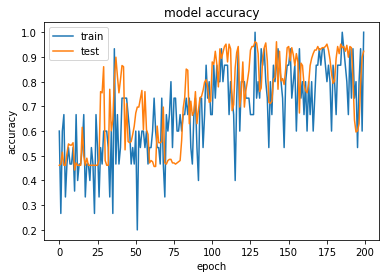

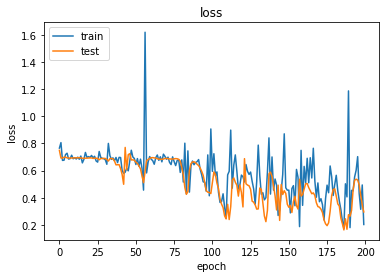

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
model.save('model.h5')